In [ ]:
!pip install matplotlib
!pip install pandas
!which python


Combinaciones únicas de IN1, IN2, IN3, IN4 y su frecuencia:
    IN1  IN2  IN3  IN4  count
0     0    0    0    0    519
1     0    0    0    1    315
2     0    0    1    0    325
3     0    0    1    1    313
4     0    1    0    0    321
5     0    1    0    1    333
6     0    1    1    0    341
7     0    1    1    1    332
8     1    0    0    0    326
9     1    0    0    1    313
10    1    0    1    0    944
11    1    0    1    1    306
12    1    1    0    0    335
13    1    1    0    1    329
14    1    1    1    0    339
15    1    1    1    1    309


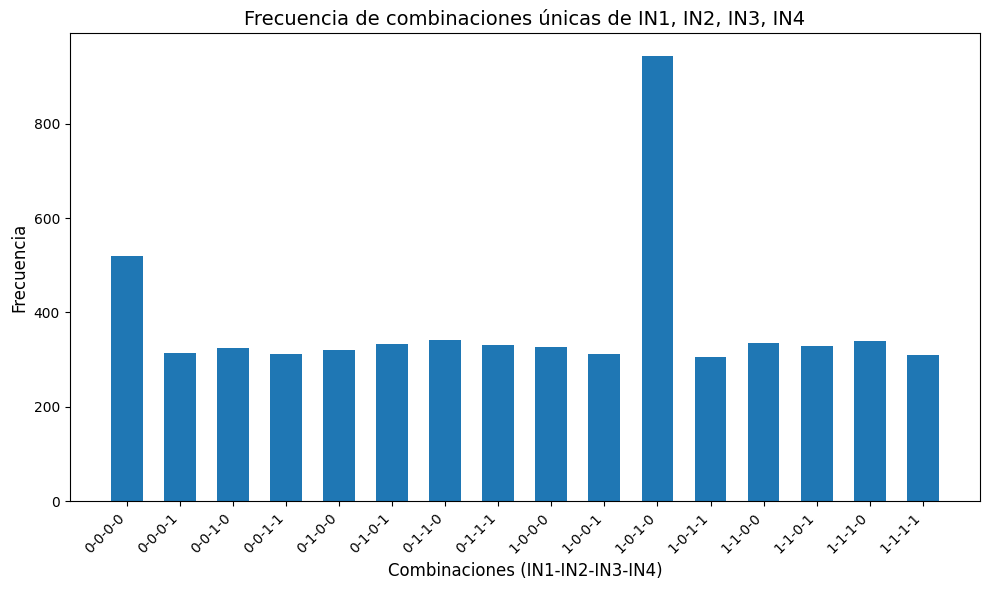

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Obtener la ruta del archivo CSV desde la ubicación actual
script_dir = os.getcwd()
file_path = os.path.join(script_dir, 'tinyml_training_data.csv')

# Cargar el archivo CSV
data = pd.read_csv(file_path)

# Verificar las combinaciones únicas de IN1, IN2, IN3, IN4
combinations = data.groupby(['IN1', 'IN2', 'IN3', 'IN4']).size().reset_index(name='count')

# Mostrar las combinaciones únicas
print("Combinaciones únicas de IN1, IN2, IN3, IN4 y su frecuencia:")
print(combinations)

# Crear un gráfico de barras para visualizar las agrupaciones
plt.figure(figsize=(10, 6))

# Convertir las combinaciones en una representación legible
combinations['combination'] = combinations[['IN1', 'IN2', 'IN3', 'IN4']].astype(str).agg('-'.join, axis=1)
plt.bar(combinations['combination'], combinations['count'], width=0.6)

# Configurar etiquetas y título
plt.title('Frecuencia de combinaciones únicas de IN1, IN2, IN3, IN4', fontsize=14)
plt.xlabel('Combinaciones (IN1-IN2-IN3-IN4)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [2]:

# Obtener la ruta del archivo CSV desde la ubicación actual
script_dir = os.getcwd()
file_path = os.path.join(script_dir, 'tinyml_training_data.csv')


# Cargar el archivo CSV
data = pd.read_csv(file_path)

# Asegurarse de que las columnas relevantes sean de tipo entero
data[['IN1', 'IN2', 'IN3', 'IN4']] = data[['IN1', 'IN2', 'IN3', 'IN4']].astype(int)

# Definir las combinaciones a eliminar
combinaciones_a_eliminar = [
    (0, 0, 1, 1),
    (0, 1, 1, 1),
    (1, 0, 1, 1),
    (1, 1, 0, 1),
    (1, 1, 1, 1),
    (1, 1, 1, 0),
    (1, 1, 0, 0)
]

# Mostrar datos antes de la eliminación
print("Cantidad de registros antes de la eliminación:", len(data))

# Verificar combinaciones existentes en los datos
combinaciones_presentes = data[['IN1', 'IN2', 'IN3', 'IN4']].apply(tuple, axis=1).value_counts()
print("Combinaciones presentes antes de filtrar:")
print(combinaciones_presentes)

# Eliminar los registros con esas combinaciones
data_filtrada = data[~data[['IN1', 'IN2', 'IN3', 'IN4']].apply(tuple, axis=1).isin(combinaciones_a_eliminar)]

# Mostrar datos después de la eliminación
print("Cantidad de registros después de la eliminación:", len(data_filtrada))

# Guardar los datos filtrados
output_path = os.path.join(script_dir, 'tinyml_training_data_clean.csv')
data_filtrada.to_csv(output_path, index=False)
print(f"Datos filtrados guardados en: {output_path}")



Cantidad de registros antes de la eliminación: 6000
Combinaciones presentes antes de filtrar:
(1, 0, 1, 0)    944
(0, 0, 0, 0)    519
(0, 1, 1, 0)    341
(1, 1, 1, 0)    339
(1, 1, 0, 0)    335
(0, 1, 0, 1)    333
(0, 1, 1, 1)    332
(1, 1, 0, 1)    329
(1, 0, 0, 0)    326
(0, 0, 1, 0)    325
(0, 1, 0, 0)    321
(0, 0, 0, 1)    315
(1, 0, 0, 1)    313
(0, 0, 1, 1)    313
(1, 1, 1, 1)    309
(1, 0, 1, 1)    306
Name: count, dtype: int64
Cantidad de registros después de la eliminación: 3737
Datos filtrados guardados en: c:\Users\dgome\OneDrive\SIN RECUPERAR\Sql\Documentos\SistemaIot\Periferico\modelos_entrenamiento\vehiculo_autonomo\tinyml_training_data_clean.csv


In [3]:
# Obtener la ruta del archivo CSV desde la ubicación actual
script_dir = os.getcwd()
file_path = os.path.join(script_dir, 'tinyml_training_data_clean.csv')

# Cargar el archivo CSV
data = pd.read_csv(file_path)

# Asegurarse de que las columnas relevantes sean de tipo entero
data[['IN1', 'IN2', 'IN3', 'IN4']] = data[['IN1', 'IN2', 'IN3', 'IN4']].astype(int)

# Definir las combinaciones a buscar
combinaciones_a_buscar = [
    (0, 0, 1, 1),
    (0, 1, 1, 1),
    (1, 0, 1, 1),
    (1, 1, 0, 1),
    (1, 1, 1, 1),
    (1, 1, 1, 0),
    (1, 1, 0, 0)
]

# Contar los registros con esas combinaciones
data['combination'] = data[['IN1', 'IN2', 'IN3', 'IN4']].apply(tuple, axis=1)
conteo = data[data['combination'].isin(combinaciones_a_buscar)].shape[0]

print(f"Cantidad de registros con combinaciones no deseadas: {conteo}")

Cantidad de registros con combinaciones no deseadas: 0


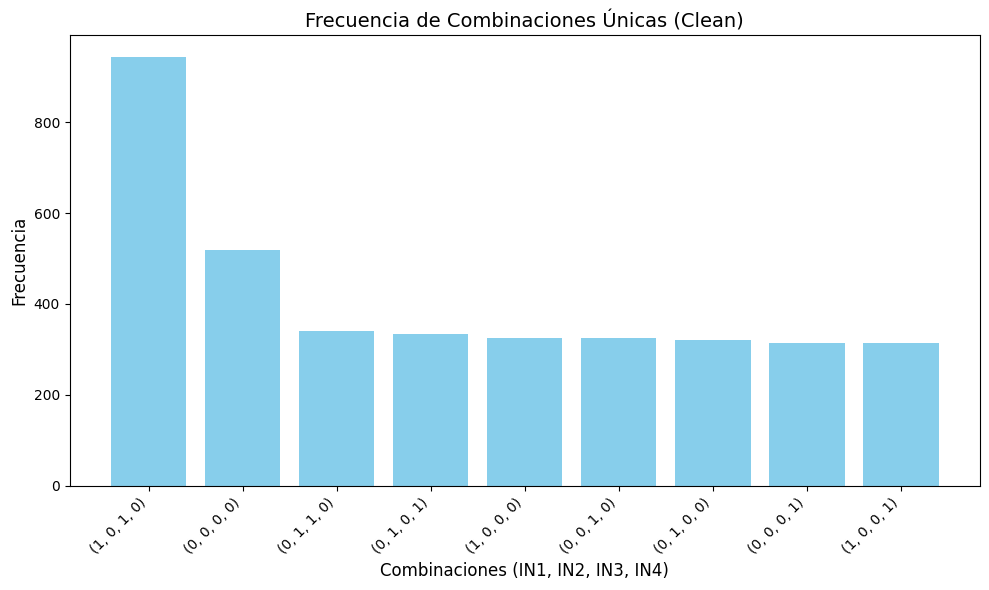

In [4]:
# Obtener la ruta del archivo CSV desde la ubicación actual
script_dir = os.getcwd()
file_path = os.path.join(script_dir, 'tinyml_training_data_clean.csv')

# Cargar el archivo CSV
data = pd.read_csv(file_path)

# Asegurarse de que las columnas relevantes sean de tipo entero
data[['IN1', 'IN2', 'IN3', 'IN4']] = data[['IN1', 'IN2', 'IN3', 'IN4']].astype(int)

# Agrupar por combinaciones únicas y contarlas
data['combination'] = data[['IN1', 'IN2', 'IN3', 'IN4']].apply(tuple, axis=1)
grouped_combinations = data['combination'].value_counts().reset_index()
grouped_combinations.columns = ['Combination', 'Count']

# Crear un gráfico de barras para las combinaciones agrupadas
plt.figure(figsize=(10, 6))
plt.bar(grouped_combinations['Combination'].astype(str), grouped_combinations['Count'], color='skyblue')

# Configurar etiquetas y título
plt.title('Frecuencia de Combinaciones Únicas (Clean)', fontsize=14)
plt.xlabel('Combinaciones (IN1, IN2, IN3, IN4)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Datos de distancias y duraciones para IN1, IN2, IN3, IN4 = 0, 0, 0, 0:
      distancia_izquierda  distancia_derecha  distancia_izquierda_duration  \
6                    10.0                6.0                          24.0   
18                   15.0                0.0                           1.0   
22                    5.0               13.0                           1.0   
104                   1.0               10.0                           1.0   
111                   2.0                6.0                           1.0   
...                   ...                ...                           ...   
3709                  3.0                4.0                          17.0   
3710                  3.0                4.0                          17.0   
3711                  3.0                4.0                          17.0   
3712                  3.0                4.0                          17.0   
3716                  8.0                6.0                           

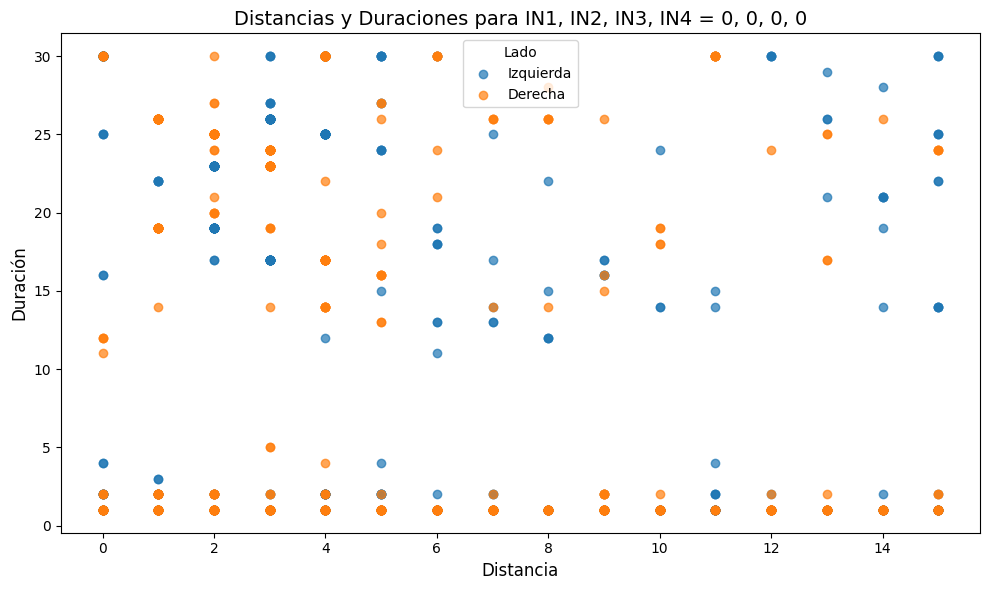

In [5]:
# Obtener la ruta del archivo CSV desde la ubicación actual
script_dir = os.getcwd()
file_path = os.path.join(script_dir, 'tinyml_training_data_clean.csv')

# Cargar el archivo CSV
data = pd.read_csv(file_path)

# Asegurarse de que las columnas relevantes sean de tipo entero
data[['IN1', 'IN2', 'IN3', 'IN4']] = data[['IN1', 'IN2', 'IN3', 'IN4']].astype(int)

# Filtrar datos donde IN1, IN2, IN3, IN4 sean 0, 0, 0, 0
filtered_data = data[(data['IN1'] == 0) & (data['IN2'] == 0) & (data['IN3'] == 0) & (data['IN4'] == 0)]

# Mostrar los datos filtrados
print("Datos de distancias y duraciones para IN1, IN2, IN3, IN4 = 0, 0, 0, 0:")
print(filtered_data[['distancia_izquierda', 'distancia_derecha', 'distancia_izquierda_duration', 'distancia_derecha_duration']])

# Crear un gráfico de dispersión para las distancias y duraciones filtradas
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['distancia_izquierda'], filtered_data['distancia_izquierda_duration'], label='Izquierda', alpha=0.7)
plt.scatter(filtered_data['distancia_derecha'], filtered_data['distancia_derecha_duration'], label='Derecha', alpha=0.7)

# Configurar etiquetas y título
plt.title('Distancias y Duraciones para IN1, IN2, IN3, IN4 = 0, 0, 0, 0', fontsize=14)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Duración', fontsize=12)
plt.legend(title='Lado')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Datos de distancias y duraciones para IN1, IN2, IN3, IN4 = 0, 0, 0, 0 y duración < 5 segundos:
      distancia_izquierda  distancia_derecha  distancia_izquierda_duration  \
18                   15.0                0.0                           1.0   
22                    5.0               13.0                           1.0   
104                   1.0               10.0                           1.0   
111                   2.0                6.0                           1.0   
115                  14.0                2.0                           1.0   
...                   ...                ...                           ...   
3654                  8.0                9.0                           1.0   
3686                  6.0                3.0                           1.0   
3688                  0.0               11.0                           2.0   
3691                 14.0                7.0                           1.0   
3716                  8.0                6.0   

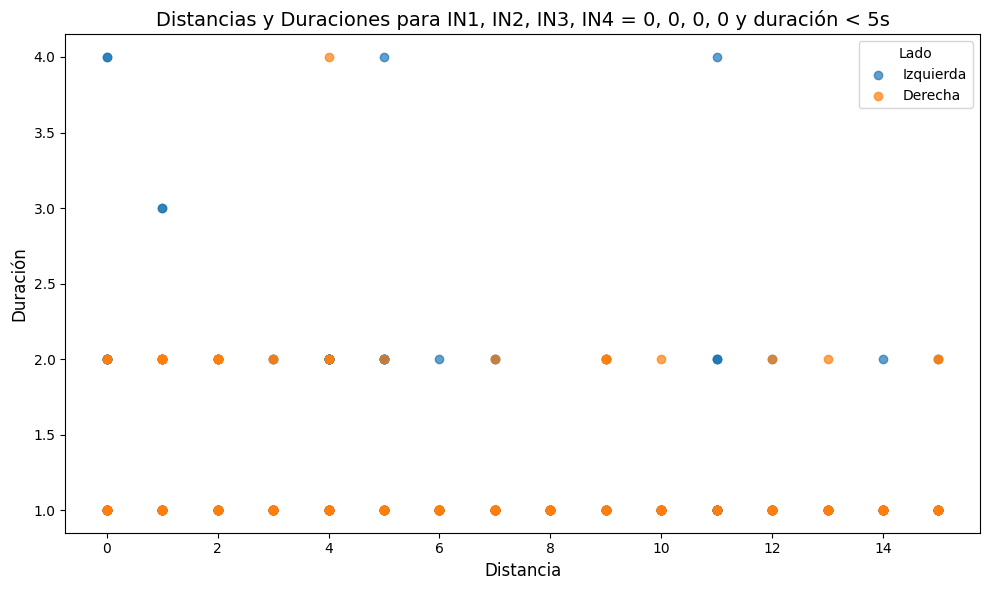

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Obtener la ruta del archivo CSV desde la ubicación actual
script_dir = os.getcwd()
file_path = os.path.join(script_dir, 'tinyml_training_data_clean.csv')

# Cargar el archivo CSV
data = pd.read_csv(file_path)

# Asegurarse de que las columnas relevantes sean de tipo entero
data[['IN1', 'IN2', 'IN3', 'IN4']] = data[['IN1', 'IN2', 'IN3', 'IN4']].astype(int)

# Filtrar datos donde IN1, IN2, IN3, IN4 sean 0, 0, 0, 0 y la duración sea menor a 5 segundos
filtered_data = data[
    (data['IN1'] == 0) & 
    (data['IN2'] == 0) & 
    (data['IN3'] == 0) & 
    (data['IN4'] == 0) & 
    (data['distancia_izquierda_duration'] < 5) & 
    (data['distancia_derecha_duration'] < 5)
]

# Mostrar los datos filtrados
print("Datos de distancias y duraciones para IN1, IN2, IN3, IN4 = 0, 0, 0, 0 y duración < 5 segundos:")
print(filtered_data[['distancia_izquierda', 'distancia_derecha', 'distancia_izquierda_duration', 'distancia_derecha_duration']])

# Crear un gráfico de dispersión para las distancias y duraciones filtradas
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['distancia_izquierda'], filtered_data['distancia_izquierda_duration'], label='Izquierda', alpha=0.7)
plt.scatter(filtered_data['distancia_derecha'], filtered_data['distancia_derecha_duration'], label='Derecha', alpha=0.7)

# Configurar etiquetas y título
plt.title('Distancias y Duraciones para IN1, IN2, IN3, IN4 = 0, 0, 0, 0 y duración < 5s', fontsize=14)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Duración', fontsize=12)
plt.legend(title='Lado')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Obtener la ruta del archivo CSV desde la ubicación actual
script_dir = os.getcwd()
file_path = os.path.join(script_dir, 'tinyml_training_data_clean.csv')

# Cargar el archivo CSV
data = pd.read_csv(file_path)

# Asegurarse de que las columnas relevantes sean de tipo entero
data[['IN1', 'IN2', 'IN3', 'IN4']] = data[['IN1', 'IN2', 'IN3', 'IN4']].astype(int)

# Filtrar datos donde IN1, IN2, IN3, IN4 sean 0, 0, 0, 0 y la duración sea menor a 5 segundos
filtered_data = data[
    (data['IN1'] == 0) & 
    (data['IN2'] == 0) & 
    (data['IN3'] == 0) & 
    (data['IN4'] == 0) & 
    (data['distancia_izquierda_duration'] > 5) & 
    (data['distancia_derecha_duration'] > 5)
]

# Mostrar los datos filtrados
print("Datos de distancias y duraciones para IN1, IN2, IN3, IN4 = 0, 0, 0, 0 y duración < 5 segundos:")
print(filtered_data[['distancia_izquierda', 'distancia_derecha', 'distancia_izquierda_duration', 'distancia_derecha_duration']])

# Crear un gráfico de dispersión para las distancias y duraciones filtradas
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['distancia_izquierda'], filtered_data['distancia_izquierda_duration'], label='Izquierda', alpha=0.7)
plt.scatter(filtered_data['distancia_derecha'], filtered_data['distancia_derecha_duration'], label='Derecha', alpha=0.7)

# Configurar etiquetas y título
plt.title('Distancias y Duraciones para IN1, IN2, IN3, IN4 = 0, 0, 0, 0 y duración < 5s', fontsize=14)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Duración', fontsize=12)
plt.legend(title='Lado')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
